In [1]:
from classifier import CLASSIFICATION_MODEL
from preprocess import load_zebra_finch, load_macaque_data
import numpy as np
from sklearn import metrics
import json
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

In [2]:
model_directory ="C:/Users/Jayde/Desktop/wavegan/m_cls1/"
spec_path = f"{model_directory}/model_specifications.json"
with open(spec_path, 'r') as f:
  specs = json.load(f)

In [3]:
model = CLASSIFICATION_MODEL(
   n_categories = specs["N Categories"],
   slice_len = specs["Slice Length"]
)

In [4]:
model.classifier.load_weights(f"{model_directory}/classifier{10}")

In [5]:
#data_path = "C:/Users/Jayde/Desktop/library/zebra_finch/data/zebra_finch/"
data_path = "C:/Users/Jayde/Desktop/library/macaques/data/train/"
data,labels = load_macaque_data(data_path,slice_len= specs["Slice Length"], model_path= model_directory, batch_size= 64)
#data, labels = load_zebra_finch(data_path, slice_len=specs["Slice Length"], model_path= model_directory, n_types = specs["N Categories"], batch_size=64, equal = True)
class_labels = {0: "AL",
                1: "IO",
                2: "MU",
                3: "TH",
                }

processed 7285 out of 7285
AL    960
IO    960
MU    960
TH    960
Name: type, dtype: int64
reduced to 3840 training samlples


In [6]:
pred_labels = np.argmax(model.classifier.predict(data), axis=1)
pred_labels = [class_labels[key] for key in pred_labels]
real_labels = np.argmax(labels, axis=1)
real_labels = [class_labels[key] for key in real_labels]


120/120 [==============================] - 101s 833ms/step


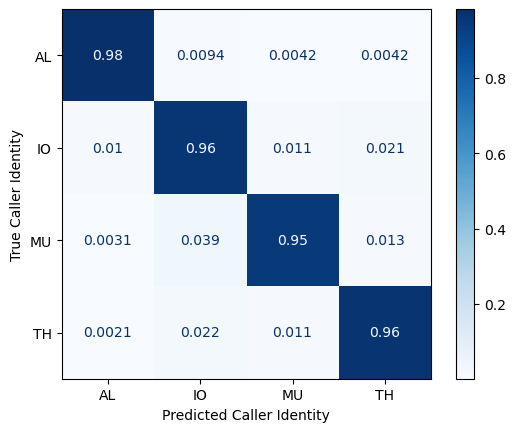

In [30]:
cm_labels = ["AL","IO","MU","TH"]
#confusion_matrix = metrics.confusion_matrix()
cm_display = metrics.ConfusionMatrixDisplay.from_predictions(y_true = real_labels, y_pred = pred_labels, normalize= 'true',cmap = "Blues")
plt.ylabel("True Caller Identity")
plt.xlabel("Predicted Caller Identity")
fig_dir = f"{model_directory}/confusionmatrix_epoch_10.png"
plt.savefig(fig_dir, dpi= 300, bbox_inches = "tight", transparent = True)
#the numbers are normalised to true labels, so what % are true

plt.show()

In [67]:
precision,recall,f1,_ =precision_recall_fscore_support(real_labels, pred_labels, average=None)
#avg = "macro" finds the mean score for the classes
avg_scores =precision_recall_fscore_support(real_labels, pred_labels, average="macro")
print(avg_scores)

(0.9627829412442872, 0.9624999999999999, 0.9625536045417777, None)


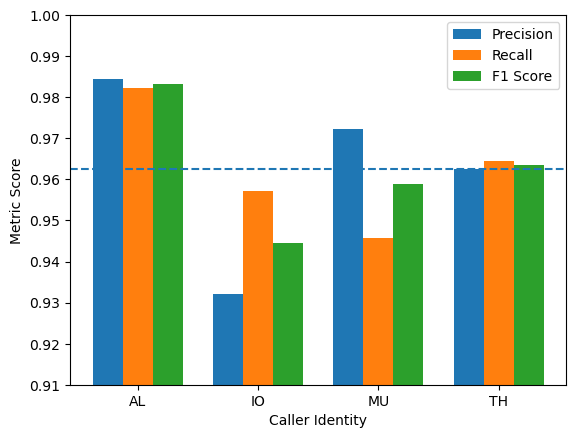

In [66]:
width = 0.25
num_labels = np.array((range(4)))
ax = plt.axes() 
plt.bar(num_labels-width,precision,label= "Precision",width=width)
plt.axhline(np.average(precision),  linestyle = "dashed")
plt.bar(num_labels,recall, label= "Recall", width=width)
plt.axhline(np.average(recall),  linestyle = "dashed")
plt.bar(num_labels+width,f1, label= "F1 Score", width=width)
plt.axhline(np.average(f1),  linestyle = "dashed")
ax.set_xticks(num_labels) 
ax.set_xticklabels(cm_labels)
plt.ylim([0.91,1])
plt.legend()
plt.xlabel("Caller Identity")
plt.ylabel("Metric Score")
plt.show()

In [ ]:
#plot precision recall f1 socre curves for each epoch